In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [14]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [16]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)
session.close()

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).first()
print(recent_date)

('2017-08-23',)


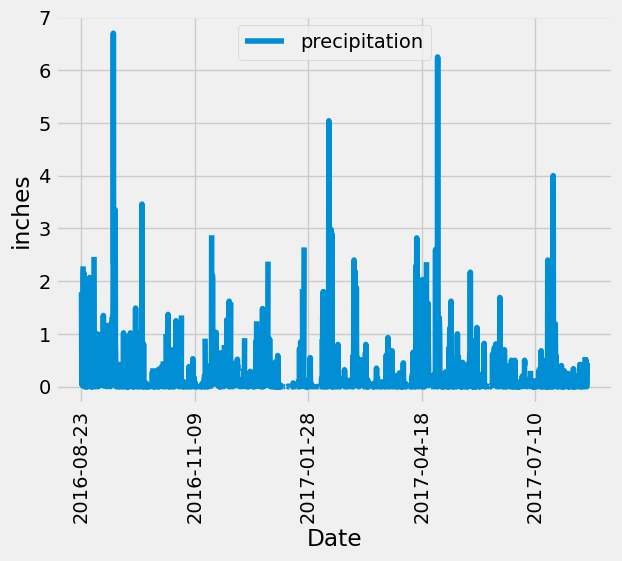

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date

l_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= l_year).all()

precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])
precipitation_df = precipitation_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("inches")
plt.show()

In [30]:
# Use Pandas to calculate the summary statistics for the precipitation data
count = precipitation_df['precipitation'].count()
mean = precipitation_df['precipitation'].mean()
std = precipitation_df['precipitation'].std()
min_value = precipitation_df['precipitation'].min()
q25 = precipitation_df['precipitation'].quantile(0.25)
median = precipitation_df['precipitation'].median()
q75 = precipitation_df['precipitation'].quantile(0.75)
max_value = precipitation_df['precipitation'].max()

# Display the results in a formatted DataFrame
summary_stats = pd.DataFrame({
    'precipitation': [count, mean, std, min_value, q25, median, q75, max_value]
}, index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

summary_stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
print(total_stations)

[(9,)]


In [40]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
m_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
m_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'

temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == m_active_station_id).all()

print(temperature_stats)

[(54.0, 85.0, 71.66378066378067)]


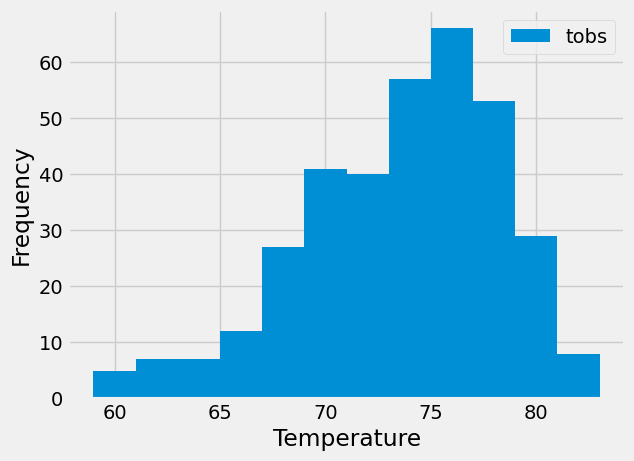

In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prev_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

most_active_station_id = 'USC00519281'  # Replace with the actual most active station ID
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= prev_year_date).all()

tobs_list = [temp[0] for temp in tobs_data]

plt.hist(tobs_list, bins=12, label="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# Close Session

In [59]:
# Close Session
session.close()